# Homework 5 + 6

## Loading Libraries

In [1]:
# Importing Libraries


# Basic Libraries #################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import sklearn
from sklearn import linear_model


# For Feature Engineering #########################################################################################

# For Plotting Correlation Matrix and Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# String Indexer
from sklearn.preprocessing import LabelEncoder

# PCA
from sklearn.decomposition import PCA


# For Machine Learning Models #####################################################################################

# For Logistic Regression
from sklearn.linear_model import LogisticRegression

# For SVM
from sklearn import svm
from sklearn.svm import SVC

# For Desicion Trees 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# For Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# For Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# For Data Anaylsis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For Metrics
from sklearn.metrics import mean_squared_error, r2_score, max_error
from numpy import mean
from numpy import std


# Personal Preference #############################################################################################
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading Data as Pandas Dataframe


dataset_file = 'Haberman-1.csv'

target_variable_name = 'Survival Status for patient died within 5 year'

df_pd = pd.read_csv(dataset_file)
df_pd.head(5)

,Age of patient at time of operation,"Patient year of operation (year - 1900, numerical)",Nodes,Survival Status for patient died within 5 year
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Question 1: Check if there is any missing value in the dataset. Perform some basi exploratory data analysis

In [3]:
# Size of Dataset


df_pd.shape

(305, 4)

In [4]:
# Data Types


pd.DataFrame(df_pd.dtypes, columns = ['Data Types'])

,Data Types
Age of patient at time of operation,int64
"Patient year of operation (year - 1900, numerical)",int64
Nodes,int64
Survival Status for patient died within 5 year,int64


In [5]:
# Basic Data Analyis


df_pd.describe()

,Age of patient at time of operation,"Patient year of operation (year - 1900, numerical)",Nodes,Survival Status for patient died within 5 year
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


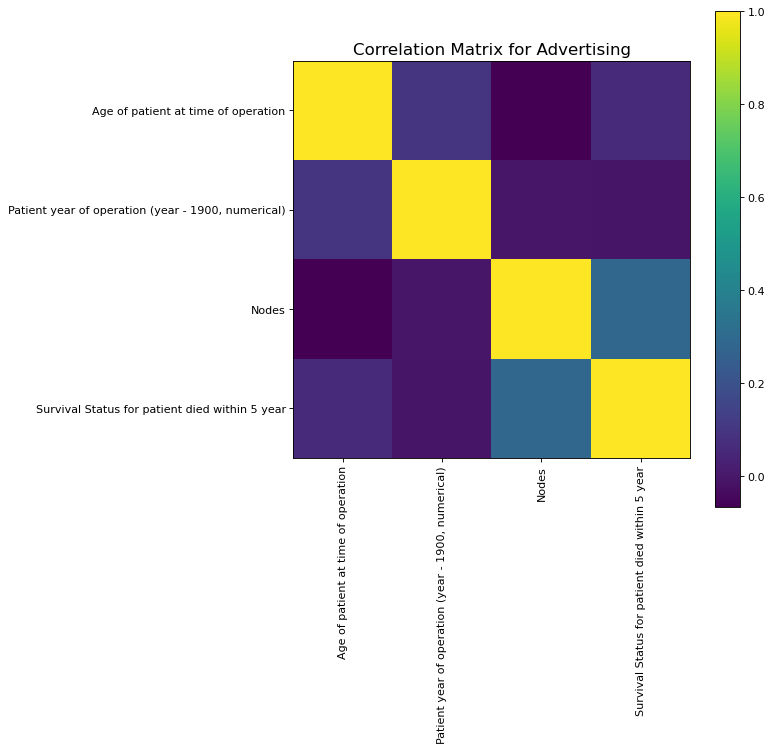

In [6]:
# Correlation Matrix


df_corrM = df_pd

def plotCorrelationMatrix(df_corrM, graphWidth):
    filename = 'Advertising'
    df = df_corrM.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


plotCorrelationMatrix(df_corrM, 8)

<Figure size 2160x720 with 0 Axes>

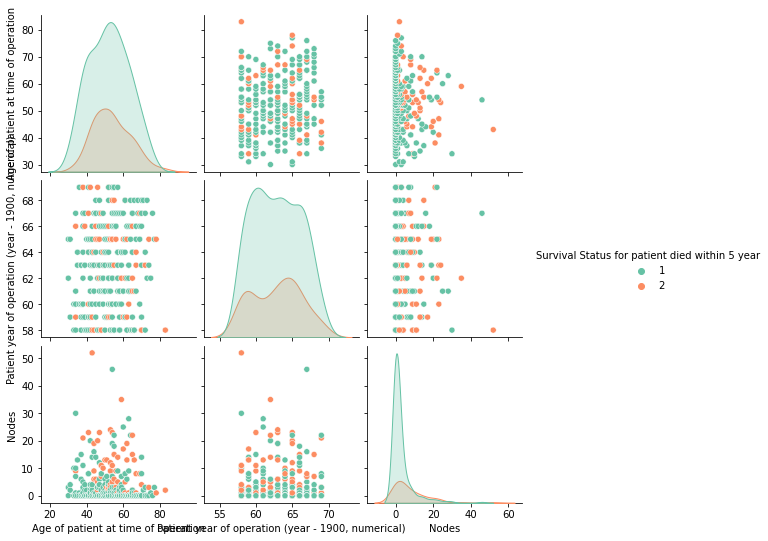

In [7]:
# Scatter Plot


plt.figure(figsize=(30,10))
sns.pairplot(data=df_pd, hue=target_variable_name, palette='Set2')

In [8]:
# Cardinality


card = df_pd.apply(pd.Series.nunique)
pd.DataFrame(card, columns = ['Cardinality'])

,Cardinality
Age of patient at time of operation,49
"Patient year of operation (year - 1900, numerical)",12
Nodes,31
Survival Status for patient died within 5 year,2


In [9]:
# Missing Values


sum_missing = df_pd.isna().sum()
pct_missing = df_pd.isna().mean()

missing_values = pd.concat([sum_missing, pct_missing], axis = 1)
missing_values = missing_values.reset_index(drop = False)
missing_values = missing_values.rename(columns = {0: 'Number of Missing Values',
                                                                                      1: 'Missing Percentage'})
missing_values

,index,Number of Missing Values,Missing Percentage
0,Age of patient at time of operation,0,0.0
1,"Patient year of operation (year - 1900, numeri...",0,0.0
2,Nodes,0,0.0
3,Survival Status for patient died within 5 year,0,0.0


In [10]:
# Removing Columns containing too many Missing Values


df_pd2 = df_pd

th = .10
# Defining threshold for cutoff percentage

bad_column = []
for i,r in missing_values.iterrows():
        c = r['index']
        mp = r["Missing Percentage"]
        if mp > th:
            bad_column.append(c)

for i in bad_column:
    for j in df_pd2.columns:
        if j == i:
            df_pd2 = df_pd2.drop(j, axis = 1)
            
print(len(df_pd2.columns))
pd.DataFrame(df_pd2.columns)

4


,0
0,Age of patient at time of operation
1,"Patient year of operation (year - 1900, numeri..."
2,Nodes
3,Survival Status for patient died within 5 year


In [11]:
# String Indexer


df_SI = df_pd2

cat_columns = df_SI.select_dtypes(['object'])
cat_columns

#Convert from object type to cat type
for i in cat_columns:
    df_SI[i] = df_SI[i].astype('category')

# Convert to Encoded values
cat_columns = df_SI.select_dtypes(['category'])
LE = LabelEncoder()
for i in cat_columns:
    df_SI[i] = LE.fit_transform(df_SI[i])
    
df_pd3 = df_SI
df_pd3

,Age of patient at time of operation,"Patient year of operation (year - 1900, numerical)",Nodes,Survival Status for patient died within 5 year
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


## Question 2: Using "Survival Status for patients died within 5 years" as your target variable, implement the following classification algorithms

### Splitting the Data

In [12]:
# Splitting the Data


target_variable_name = 'Survival Status for patient died within 5 year'

# Setting the pre-proccessed dataframe
df_datasplit = df_pd3

X = df_datasplit.drop(target_variable_name, axis = 1)
y = df_datasplit[target_variable_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
# Recording Results


Train_score = []
Test_score = []
r2 = []
MSE = []
ME = []

### Logisitic Regression

In [14]:
# Simple Logistic Regression


import time
start_time = time.time()

# Running Model
lregressor1 = LogisticRegression()
lregressor1.fit(X_train, y_train)

# Predicting
y_pred_LR = lregressor1.predict(X_test)

stop_time = time.time() - start_time
print(stop_time)

0.0


In [15]:
# Results for Simple Logistic Regression


Train_Score_LR = lregressor1.score(X_train,y_train)*100
Train_score.append(Train_Score_LR)
print("Trainning Score is {}".format(Train_Score_LR))

Test_Score_LR = lregressor1.score(X_test,y_test)*100
Test_score.append(Test_Score_LR)
print("Testing Score is {}".format(Test_Score_LR))

Trainning Score is 73.36065573770492
Testing Score is 77.04918032786885


### Decision Tree

In [16]:
# Decision Tree


# Running Model
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)

# Predicting
y_pred_DT = DecisionTree.predict(X_test)

In [17]:
# Results for Decision Tree


Train_Score_DT = DecisionTree.score(X_train,y_train)*100
Train_score.append(Train_Score_DT)
print("Trainning Score is {}".format(Train_Score_DT))

Test_Score_DT = DecisionTree.score(X_test,y_test)*100
Test_score.append(Test_Score_DT)
print("Testing Score is {}".format(Test_Score_DT))

Trainning Score is 98.36065573770492
Testing Score is 65.57377049180327


### Random Forest

In [18]:
# Random Forest (Max Depth = 5)


start_time = time.time()

# Running Model
RFRegressor = RandomForestClassifier(max_depth= 5, random_state=0)
RFRegressor.fit(X_train,y_train)

# Predicting
y_pred_RF = RFRegressor.predict(X_test)

stop_time = time.time() - start_time
print(stop_time)

0.07853460311889648


In [19]:
# Results for Random Forest Regressor


Train_Score_RF = RFRegressor.score(X_train,y_train)*100
Train_score.append(Train_Score_RF)
print("Trainning Score is {}".format(Train_Score_RF))

Test_Score_RF = RFRegressor.score(X_test,y_test)*100
Test_score.append(Test_Score_RF)
print("Testing Score is {}".format(Test_Score_RF))

Trainning Score is 84.01639344262296
Testing Score is 77.04918032786885


### Support Vector Machine

In [20]:
# Running SVM


# Sigmoid was selected  due to the Binary Output
svmachine = SVC(kernel='sigmoid') #sigmoid, poly, rbf, ... 
svmachine.fit(X_train, y_train)

# Predicting
y_pred_SVM = svmachine.predict(X_test)

In [21]:
# Results for Random Forest Regressor


Train_Score_SVM = svmachine.score(X_train,y_train)*100
Train_score.append(Train_Score_SVM)
print("Trainning Score is {}".format(Train_Score_SVM))

Test_Score_SVM = svmachine.score(X_test,y_test)*100
Test_score.append(Test_Score_SVM)
print("Testing Score is {}".format(Test_Score_SVM))

Trainning Score is 72.95081967213115
Testing Score is 75.40983606557377


### Adaboost

In [22]:
# Running Adaboost with Repeated Stratified K Folds


ab = AdaBoostClassifier(random_state=1)
ab.fit(X_train, y_train)

# Predicting
y_pred_AB = ab.predict(X_test)


In [23]:
# Results


Train_Score_AB = ab.score(X_train,y_train)*100
Train_score.append(Train_Score_AB)
print("Trainning Score is {}".format(Train_Score_AB))

Test_Score_AB = ab.score(X_test,y_test)*100
Test_score.append(Test_Score_AB)
print("Testing Score is {}".format(Test_Score_AB))

Trainning Score is 79.91803278688525
Testing Score is 70.49180327868852


### Naive Bayes Classifier

In [24]:
# Running Gaussian Naive Bayes Classifier


# Running Model
gnb = GaussianNB()
gnb.fit(X_train,y_train)

# Predicting
gnb.predict(X_test)

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [47]:
# Results


Train_Score_GNB = gnb.score(X_train,y_train)*100
Train_score.append(Train_Score_GNB)
print("Trainning Score is {}".format(Train_Score_GNB))

Test_Score_GNB = gnb.score(X_test,y_test)*100
Test_score.append(Test_Score_GNB)
print("Testing Score is {}".format(Test_Score_GNB))

Trainning Score is 73.66255144032921
Testing Score is 80.64516129032258


## Question 3: Make a comparison of the prediction performance of the different algorithms implemented

In [26]:
print(Test_score)
print(Train_score)

[77.04918032786885, 65.57377049180327, 77.04918032786885, 75.40983606557377, 70.49180327868852, 78.68852459016394]
[73.36065573770492, 98.36065573770492, 84.01639344262296, 72.95081967213115, 79.91803278688525, 73.77049180327869]


In [27]:
# Preparing Results

results_df_Train = pd.DataFrame(Train_score, columns = ['Training Scores'])
results_df_Test = pd.DataFrame(Test_score, columns = ['Test Scores'])


results_df = pd.concat([results_df_Test,results_df_Train], axis = 1)
results_df
results_df_round = round(results_df, 2)
results_df_t = results_df_round.T
results_df_t.head()

,0,1,2,3,4,5
Test Scores,77.05,65.57,77.05,75.41,70.49,78.69
Training Scores,73.36,98.36,84.02,72.95,79.92,73.77


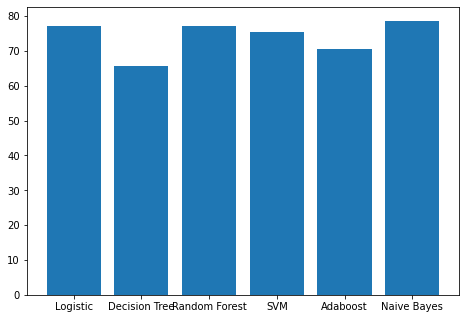

In [28]:
# Plotting Results Test Data

array = ['Logistic', 'Decision Tree', 'Random Forest', 'SVM', 'Adaboost','Naive Bayes']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(array, Test_score)
plt.show()

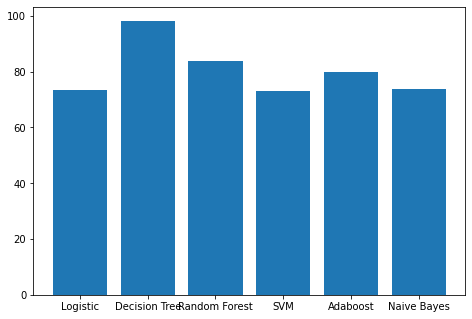

In [32]:
# Plotting Results Training Data


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(array, Train_score)
plt.show()

## Question 4: There is a problem with the dataset. Try detecting the problem and correct your predictions

In [30]:
# Seeing if the problem is in the Y variable


Amount_False = np.sum(df_pd["Survival Status for patient died within 5 year"] == 1)
Amount_True = np.sum(df_pd["Survival Status for patient died within 5 year"] == 2)
Total_Amount = np.sum(df_pd["Survival Status for patient died within 5 year"])


print('The amount of that were false: {}'.format(Amount_False))
print('The amount of that were true: {}'.format(Amount_True))

The amount of that were false: 224
The amount of that were true: 81


<AxesSubplot:xlabel='Survival Status for patient died within 5 year', ylabel='count'>

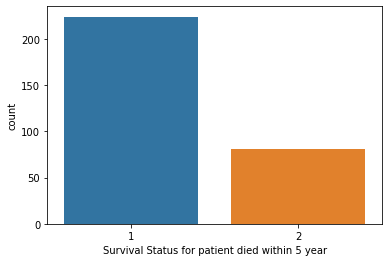

In [31]:
# Plotting 


sns.countplot(df_pd['Survival Status for patient died within 5 year'])

The problem with the dataset is an imbalance of outcomes. To change predictions we would need to either collect more data, decrease the amount of data to where they are equal or generate data until both outcomes have equal amount of data. The final solution is making sure the data is proportionally split into training and testing data.

In [42]:
# Splitting the Data


target_variable_name = 'Survival Status for patient died within 5 year'

# Splitting the values
df_datasplit1 = df_pd3[df_pd3['Survival Status for patient died within 5 year'] != 1]
df_datasplit2 = df_pd3[df_pd3['Survival Status for patient died within 5 year'] != 2]


In [43]:
# Setting the pre-proccessed dataframe


df_datasplit = df_datasplit1

X = df_datasplit.drop(target_variable_name, axis = 1)
y = df_datasplit[target_variable_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setting the pre-processed dataframe 2
df_datasplit = df_datasplit2

X2 = df_datasplit.drop(target_variable_name, axis = 1)
y2 = df_datasplit[target_variable_name]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

In [44]:
# Consolidating the Data


X_train = X_train.append(X2_train)
X_test = X_test.append(X2_test)
y_train = y_train.append(y2_train)
y_test = y_test.append(y2_test)

In [45]:
print(X_train.shape)
print(y_train.shape)

(243, 3)
(243,)


In [46]:
# Running Gaussian Naive Bayes Classifier (as test)


# Running Model
gnb = GaussianNB()
gnb.fit(X_train,y_train)

# Predicting
gnb.predict(X_test)

# Results
Train_Score_GNB = gnb.score(X_train,y_train)*100
print("Trainning Score is {}".format(Train_Score_GNB))

Test_Score_GNB = gnb.score(X_test,y_test)*100
print("Testing Score is {}".format(Test_Score_GNB))

Trainning Score is 73.66255144032921
Testing Score is 80.64516129032258
